In [72]:
import pandas as pd
import numpy as np

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_rows = None

# Read The Data Set

In [74]:
df = pd.read_csv('Churn_Modelling.csv')

In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [77]:
df.shape

(10000, 14)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [79]:
#null values in data set
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
df.describe(include= 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [81]:
#Droping the features
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [82]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [84]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [85]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Not Handling Imbalanced

In [86]:
import seaborn as sns

In [87]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

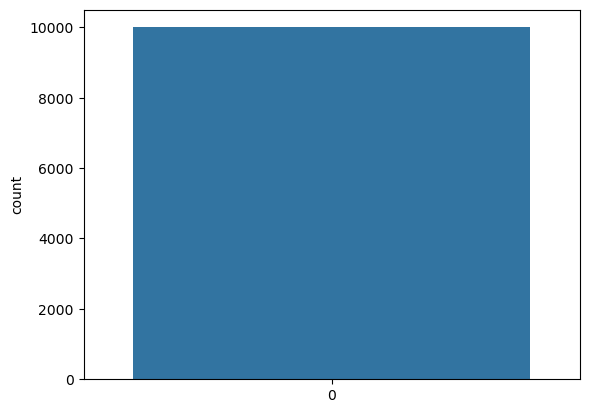

In [88]:
sns.countplot(df['Exited'])

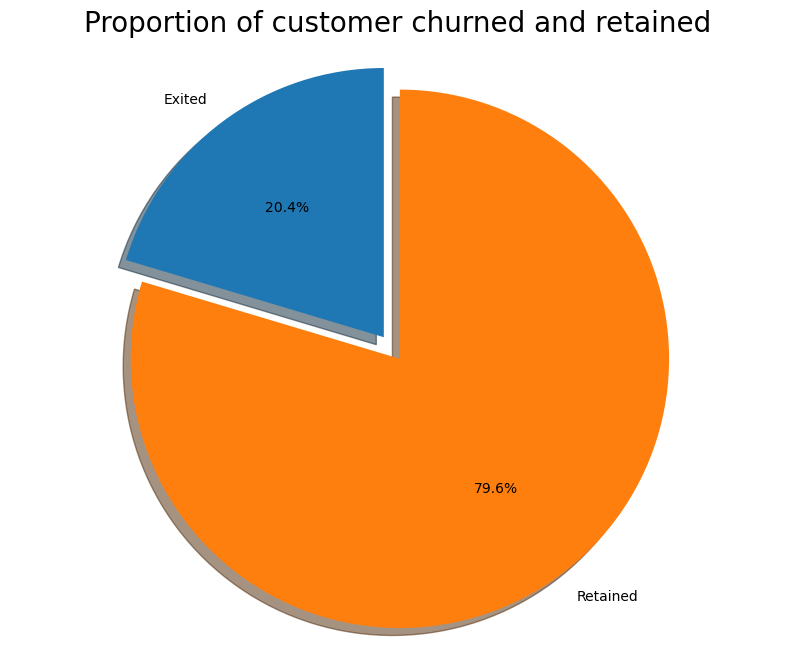

In [89]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [90]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [91]:
y

0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      1
31      0
32      0
33      0
34      0
35      1
36      0
37      0
38      0
39      0
40      0
41      1
42      0
43      1
44      0
45      0
46      1
47      1
48      0
49      0
50      0
51      0
52      0
53      1
54      1
55      0
56      0
57      0
58      1
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      1
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      1
87      0
88      1
89      0
90      1
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


# Handling Imbalanced Data with SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [94]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Train And Test

In [95]:
import sklearn

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test= train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
sc = StandardScaler()

In [100]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [101]:
X_train

array([[-0.30975317,  1.21306233, -0.29491558, ..., -0.5744499 ,
        -0.45837363, -0.84415388],
       [ 1.08814878,  0.10627208, -1.40193518, ..., -0.5744499 ,
        -0.45837363,  1.18461814],
       [-0.38620093,  1.9173834 , -1.40193518, ..., -0.5744499 ,
        -0.45837363, -0.84415388],
       ...,
       [ 0.19261784,  0.20688938,  1.18111055, ..., -0.5744499 ,
        -0.45837363,  1.18461814],
       [-1.01962525,  0.50874126,  0.07409095, ...,  1.74079583,
        -0.45837363, -0.84415388],
       [ 0.52025111,  1.01182774, -1.40193518, ...,  1.74079583,
        -0.45837363,  1.18461814]])

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log = LogisticRegression()

In [104]:
log.fit(X_train,y_train)

LogisticRegression()

In [105]:
y_pred1 = log.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_pred1)

0.7840552416823603

In [108]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [109]:
precision_score(y_test,y_pred1)

0.7732154137713203

In [110]:
recall_score(y_test,y_pred1)

0.7881519639407598

In [111]:
f1_score(y_test,y_pred1)

0.7806122448979592

In [112]:
from sklearn import metrics

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
lr_model_single = LogisticRegression()

# fit the model with data
lr_model_single.fit(X_train,y_train)
y_pred=lr_model_single.predict(X_test)
X
lr_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",lr_acc)

Accuracy:  0.7876


# SVM

In [114]:
from sklearn import svm

In [115]:
svm = svm.SVC()

In [116]:
svm.fit(X_train,y_train)

SVC()

In [117]:
y_pred2 = svm.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred2)

0.7964

# KNeighbors Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier()

In [121]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred3 = knn.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred3)

0.7624

# Decision Tree Classifier

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt = DecisionTreeClassifier()

In [126]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [127]:
y_pred4 = dt.predict(X_test)

In [128]:
accuracy_score(y_test,y_pred4)

0.7964

In [129]:
precision_score(y_test,y_pred4)

0.5

# Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier()

In [132]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
y_pred5 = rf.predict(X_test)

In [134]:
accuracy_score(y_test,y_pred5)

0.868

In [135]:
precision_score(y_test,y_pred5)

0.7549857549857549

# Gradient Boosting Classifier

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
gbc = GradientBoostingClassifier()

In [138]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [139]:
y_pred6 = gbc.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred6)

0.8672

In [141]:
precision_score(y_test,y_pred6)

0.7521367521367521